# 07. bonniema/salary-predictor

## Model 4: Deep Learning Models with Word Embeddings

## Import libraries and the final salary dataset

In [1]:
import time
from time import time
from pprint import pprint
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

# NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.collocations import *
import string, re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Deep learning
import tensorflow as tf
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D, MaxPooling2D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier #to use Keras in sklearn

# Deep Learning - Mixed inputs
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate
from keras.optimizers import Adam, RMSprop

%matplotlib inline
np.random.seed(0)

[nltk_data] Downloading package stopwords to C:\Users\Doğan Yiğit
[nltk_data]     Yenigün\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
salary_df = pd.read_csv('salary_final_done.csv')

In [3]:
print(salary_df.shape)
salary_df.drop('Unnamed: 0.2', axis=1, inplace=True)
salary_df.drop('Unnamed: 0.1', axis=1, inplace=True)
salary_df.drop('Unnamed: 0', axis=1, inplace=True)
salary_df.head()

(963, 27)


,Title,Company,Link,Review,Salary,Description,Location2,Rate_by,low,high,...,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,combined_text,Salary_Bins
0,"2021048 Data Scientist $215,000.00",B4CORP,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,"Up to $215,000 a year",Position Requires a Top Secret (TS/SCI) Cleara...,"Arlington, VA",Yearly,"Up to $215,000 a year",NaN,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,"2021048 Data Scientist $215,000.00 Position Re...",5
1,Data Science/Data Analyst,CRAiC LLC,https://www.indeed.com/company/CRAiC-LLC/jobs/...,None,"$60,000 a year",Cost Readiness Analytics (CRAiC LLC) is lookin...,"Arlington, VA",Yearly,"$60,000 a year",NaN,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Data Science/Data Analyst Cost Readiness Analy...,1
2,Data Science Intern,MilliporeSigma,https://www.indeed.com/company/Serono/jobs/Dat...,3.9,$20 - $25 an hour,Job Title: Data Science Intern\rA career with ...,"Arlington, VA",Hourly,$20,$25 an hour,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Data Science Intern Job Title: Data Science In...,0
3,Jr. Data Scientist,Numero Data LLC,https://www.indeed.com/company/Numero-Data-LLC...,None,"$70,000 - $85,000 a year",Ideal candidate should have a degree in a quan...,"Arlington, VA",Yearly,"$70,000","$85,000 a year",...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Jr. Data Scientist Ideal candidate should have...,2
4,Business Data Quality Engineer,HRU Technical Resources,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,None,$45 - $55 an hour,Please note that this is not a corp to corp or...,"Arlington, VA",Hourly,$45,$55 an hour,...,36.0,"Arlington, VA",80.159143,58.838571,69.961143,76.886286,78.608571,115.594571,Business Data Quality Engineer Please note tha...,3


In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Title                           963 non-null    object 
 1   Company                         963 non-null    object 
 2   Link                            963 non-null    object 
 3   Review                          963 non-null    object 
 4   Salary                          963 non-null    object 
 5   Description                     963 non-null    object 
 6   Location2                       958 non-null    object 
 7   Rate_by                         963 non-null    object 
 8   low                             963 non-null    object 
 9   high                            762 non-null    object 
 10  min                             963 non-null    float64
 11  max                             963 non-null    float64
 12  adjusted_salary                 963 

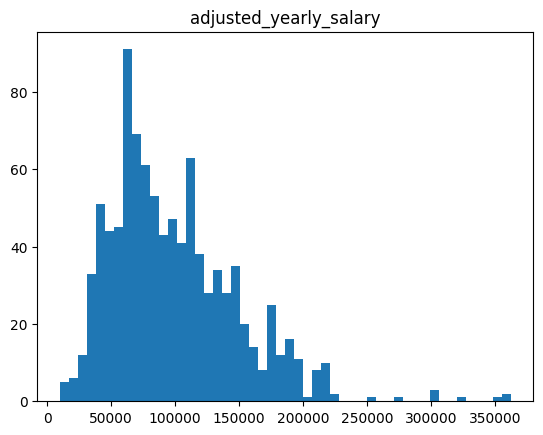

In [5]:
salary_df.hist('adjusted_yearly_salary', bins=50)
plt.grid(axis='both')
plt.show()

In [6]:
salary_df['adjusted_yearly_salary'].max() - salary_df['adjusted_yearly_salary'].min()

352500.0

In [7]:
salary_df['adjusted_yearly_salary'].quantile(list(np.linspace(0,1,7)))

0.000000     10000.000000
0.166667     54026.666667
0.333333     70000.000000
0.500000     90000.000000
0.666667    114400.000000
0.833333    145600.000000
1.000000    362500.000000
Name: adjusted_yearly_salary, dtype: float64

In [8]:
salary_df['Salary_Bins']

0      5
1      1
2      0
3      2
4      3
      ..
958    3
959    3
960    3
961    2
962    2
Name: Salary_Bins, Length: 963, dtype: int64

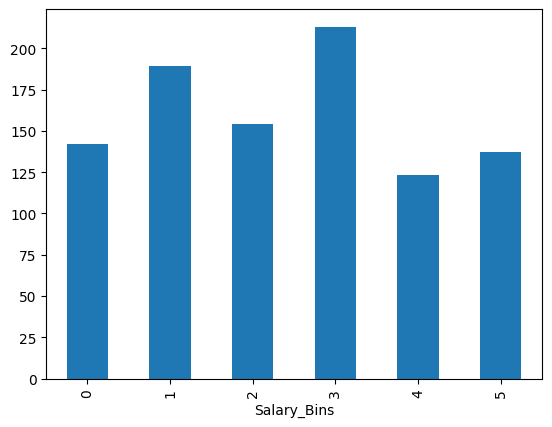

In [9]:
salary_df.groupby('Salary_Bins')['Location2'].count().plot.bar()
plt.show()

In [10]:
# Categorical target
target_class = salary_df['Salary_Bins'].astype('category')

In [11]:
target_class

0      5
1      1
2      0
3      2
4      3
      ..
958    3
959    3
960    3
961    2
962    2
Name: Salary_Bins, Length: 963, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [12]:
def clean_word(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    stopwords_list += ['www','http','com','llc','covid','non','pm','am','eg','e','g','ie','i']
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [word for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)

    return pd.Series(jd_data) # Turn list of lists to series of lists to use in Word2Vec

In [13]:
data = clean_word(salary_df['combined_text'])

In [14]:
data

0      [data, scientist, position, requires, top, sec...
1      [data, science, data, analyst, cost, readiness...
2      [data, science, intern, job, title, data, scie...
3      [jr, data, scientist, ideal, candidate, degree...
4      [business, data, quality, engineer, please, no...
                             ...                        
958    [data, engineering, ii, data, engineering, ii,...
959    [ir, day, shift, tier, ir, day, shift, salary,...
960    [security, engineer, security, engineer, salar...
961    [fdp, analyst, position, title, fdp, analyst, ...
962    [junior, ms, access, vba, developer, want, acc...
Length: 963, dtype: object

## Model 4: Deep Learning Models with Word Embeddings

Each job description will be mapped into a real vector domain. It's a popular technique when working with text called 'word embedding'. Here, words are encoded as real-valued vectors in a high dimensional space; the similarity between words in terms of meaning translates to closeness in the vector space.

Thankfully, Keras provides a convenient way to convert integer representations of word into a word embedding by 'Embedding' layer.

Below each word is mapped into a 64-length real-valued vector (embedding size). There will also be a limit to the total number of words that we are interested in modeling to 1000 most frequent words, and the rest is zero. Then, the sequence length (number of words) in each review varies, thus each job description will be constrained to be 500 words, truncating long reviews and pad the shorter reviews with zero values.

In [27]:
tokenizer = text.Tokenizer() 
tokenizer.num_words = 1000    # Limit the number of words to keep most common 1000 words
tokenizer.fit_on_texts(list(salary_df['combined_text']))
list_tokenized_jd = tokenizer.texts_to_sequences(salary_df['combined_text'])

X_t = pad_sequences(list_tokenized_jd, maxlen=400, padding = 'post')

In [28]:
X_t

array([[947, 646,  13, ..., 227, 111, 893],
       [  9,  69,   9, ...,   0,   0,   0],
       [103, 338, 102, ...,   2, 305, 281],
       ...,
       [151,  97, 151, ...,   0,   0,   0],
       [ 62,  47, 806, ...,   0,   0,   0],
       [ 95, 953,  29, ..., 477, 100,  30]])

In [29]:
X_t.shape

(963, 400)

In [30]:
len(list_tokenized_jd)

963

In [31]:
# Encoding to categorical classes
y = to_categorical(target_class.values, num_classes=6, dtype="float32")

In [33]:
print(y.shape)
y

(963, 6)


array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [36]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=4)

In [37]:
print(X_test.shape, y_test.shape)

(193, 400) (193, 6)


### Create deep learning models

In [38]:
# ATTEMPT 1: Base model
model = Sequential()
embedding_size = 64  # each word onto a 64 length real valued vector
model.add(Embedding(input_dim = 1000, output_dim = embedding_size, input_length = 400)) 
model.add(LSTM(100))
# model.add(LSTM(64))
# model.add(GlobalMaxPool1D())
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
# model.add(Flatten())   #add Flatten layer 
model.add(Dense(6, activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 64)           64000     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
Total params: 137,606
Trainable params: 137,606
Non-trai

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=[X_test, y_test])

Epoch 1/20
16/16 [==============================] - 9s 471ms/step - loss: 1.7883 - accuracy: 0.1831 - val_loss: 1.7808 - val_accuracy: 0.1969
Epoch 2/20
16/16 [==============================] - 8s 474ms/step - loss: 1.7822 - accuracy: 0.2169 - val_loss: 1.7728 - val_accuracy: 0.2021
Epoch 3/20
16/16 [==============================] - 8s 501ms/step - loss: 1.7692 - accuracy: 0.2312 - val_loss: 1.7577 - val_accuracy: 0.1969
Epoch 4/20
16/16 [==============================] - 9s 551ms/step - loss: 1.7605 - accuracy: 0.2221 - val_loss: 1.7549 - val_accuracy: 0.2021
Epoch 5/20
16/16 [==============================] - 9s 572ms/step - loss: 1.7354 - accuracy: 0.2597 - val_loss: 1.7505 - val_accuracy: 0.1813
Epoch 6/20
16/16 [==============================] - 9s 583ms/step - loss: 1.6989 - accuracy: 0.2805 - val_loss: 1.7505 - val_accuracy: 0.2124
Epoch 7/20
16/16 [==============================] - 9s 575ms/step - loss: 1.7014 - accuracy: 0.2792 - val_loss: 1.7622 - val_accuracy: 0.1969
Epoch 

Train: 0.378, Test: 0.244


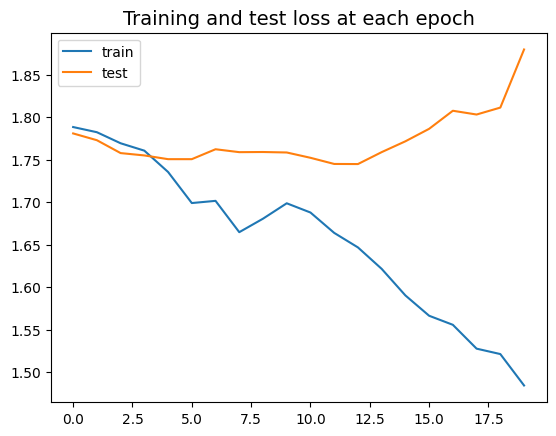

In [42]:
# Evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Training and test loss at each epoch', fontsize=14)
plt.legend()
plt.show()

The Neural Network model with simple LSTM layer didn't perform much better than previous SGD or RandomForest Classification models. Therefore, some hyperparameter tuning are required.

Options for tuning the Network Model:

- Word2Vec / GloVe embedding:https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
- Optimizers
- Learning Rate
- Batch Size
- Regularization (to prevent overfitting)
- Dropout
- Early Stopping

### Hyperparameter tuning on a regular embedding layer

In [43]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.1, random_state=4)

In [44]:
# ATTEMPT 2: Add Convolutional Layer and MaxPooling Layer
model = Sequential()
embedding_size = 128  # Each word onto a 128 length real valued vector
model.add(Embedding(input_dim = 1000, output_dim = embedding_size, input_length = 400))
model.add(Conv1D(filters=32, kernel_size = 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
# model.add(LSTM(64))
# model.add(GlobalMaxPool1D())
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Flatten())   #add Flatten layer 
model.add(Dense(6, activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 128)          128000    
                                                                 
 conv1d (Conv1D)             (None, 400, 32)           12320     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 200, 32)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                      

In [47]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/20
28/28 [==============================] - 4s 95ms/step - loss: 1.7869 - accuracy: 0.1848 - val_loss: 1.7857 - val_accuracy: 0.2474
Epoch 2/20
28/28 [==============================] - 2s 77ms/step - loss: 1.7747 - accuracy: 0.2275 - val_loss: 1.7779 - val_accuracy: 0.2474
Epoch 3/20
28/28 [==============================] - 2s 74ms/step - loss: 1.7636 - accuracy: 0.2252 - val_loss: 1.7572 - val_accuracy: 0.2371
Epoch 4/20
28/28 [==============================] - 2s 76ms/step - loss: 1.7447 - accuracy: 0.2344 - val_loss: 1.7411 - val_accuracy: 0.2577
Epoch 5/20
28/28 [==============================] - 2s 73ms/step - loss: 1.7183 - accuracy: 0.2552 - val_loss: 1.7001 - val_accuracy: 0.2887
Epoch 6/20
28/28 [==============================] - 2s 73ms/step - loss: 1.6636 - accuracy: 0.2783 - val_loss: 1.6561 - val_accuracy: 0.2887
Epoch 7/20
28/28 [==============================] - 2s 77ms/step - loss: 1.6053 - accuracy: 0.2910 - val_loss: 1.7037 - val_accuracy: 0.3093
Epoch 8/20
28

Train Accuracy: 0.471, Test Accuracy: 0.309


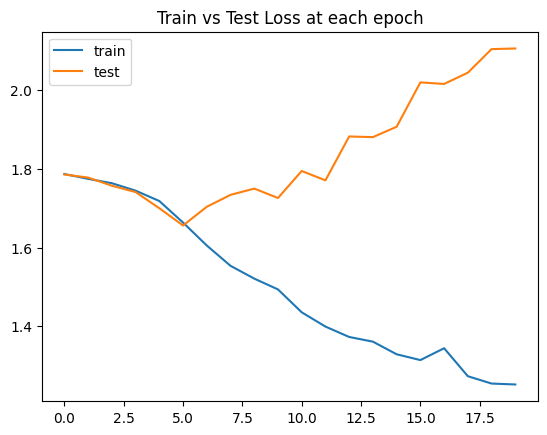

In [48]:
# Evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Train vs Test Loss at each epoch")
plt.legend()
plt.show()

There is a slight increase for both train and test accuracies. In addition, train loss was decreased, but on the other hand, it was increased for test.

In [53]:
# ATTEMPT 3: Add Early Stopping layer, L1 and L2 regularization
model = Sequential()
embedding_size = 64  
model.add(Embedding(input_dim = 1000, output_dim = embedding_size, input_length = 400)) 
model.add(Conv1D(filters=32, kernel_size = 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 400, 64)           64000     
                                                                 
 conv1d_3 (Conv1D)           (None, 400, 32)           6176      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 200, 32)          0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 200, 128)          82432     
                                                                 
 dense_9 (Dense)             (None, 200, 100)          12900     
                                                                 
 dropout_4 (Dropout)         (None, 200, 100)          0         
                                                      

In [55]:
es = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=[X_test, y_test], callbacks=[es])

Epoch 1/30
28/28 [==============================] - 5s 135ms/step - loss: 1.7771 - accuracy: 0.2021 - val_loss: 1.7669 - val_accuracy: 0.2474
Epoch 2/30
28/28 [==============================] - 3s 118ms/step - loss: 1.7540 - accuracy: 0.2448 - val_loss: 1.7137 - val_accuracy: 0.2990
Epoch 3/30
28/28 [==============================] - 3s 116ms/step - loss: 1.5798 - accuracy: 0.3360 - val_loss: 1.9380 - val_accuracy: 0.2887
Epoch 4/30
28/28 [==============================] - 3s 123ms/step - loss: 1.3847 - accuracy: 0.4203 - val_loss: 1.7933 - val_accuracy: 0.4330
Epoch 5/30
28/28 [==============================] - 4s 127ms/step - loss: 1.1469 - accuracy: 0.5092 - val_loss: 1.5438 - val_accuracy: 0.4021
Epoch 6/30
28/28 [==============================] - 3s 121ms/step - loss: 0.8642 - accuracy: 0.6755 - val_loss: 1.5799 - val_accuracy: 0.4948
Epoch 7/30
28/28 [==============================] - 3s 121ms/step - loss: 0.6638 - accuracy: 0.7460 - val_loss: 1.7427 - val_accuracy: 0.4639
Epoch 

Train Accuracy: 0.954, Test Accuracy: 0.454


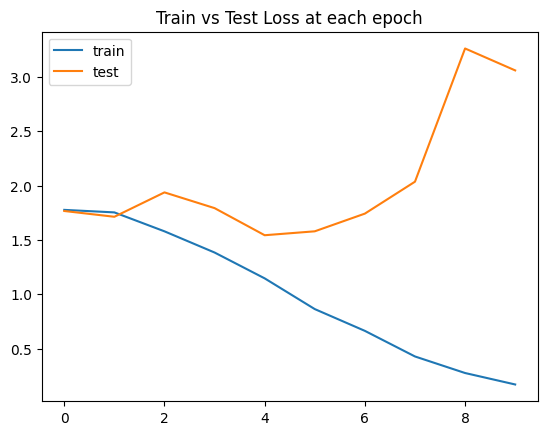

In [56]:
# Evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Train vs Test Loss at each epoch")
plt.legend()
plt.show()

There is a significant increase to train accuracy (gets close to 100%, might be overfitting) and also small improvement for test accuracy.

About loss, there is a big decrease for train, but unlike the previous two models, a large increase for test.